In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [62]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4d/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [63]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,0.333333,0,,0,,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.000000,0,,0,,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,0.800000,0,,0,,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,1.000000,0,,0,,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,0.600000,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,0.200000,0,,0,,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.000000,0,,0,,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,0.666667,0,,0,,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,0.400000,0,,0,,0.0,NO


<Axes: title={'center': 'sumas'}, xlabel='clases'>

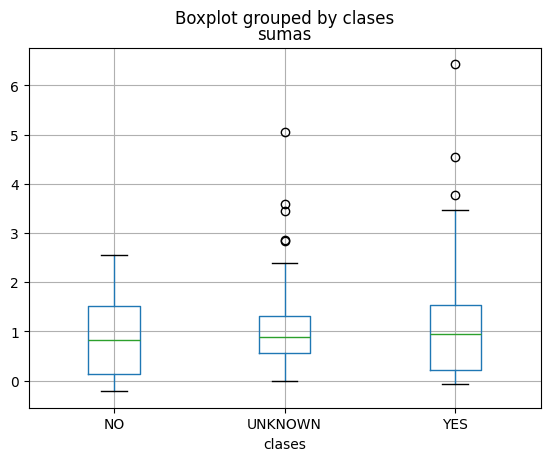

In [121]:
train.boxplot(by="clases",column="sumas")

## Eliminar características

In [65]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,0.333333,0,,0,,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.000000,0,,0,,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,0.800000,0,,0,,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,1.000000,0,,0,,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,0.600000,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,0.200000,0,,0,,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.000000,0,,0,,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,0.666667,0,,0,,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,0.400000,0,,0,,0.0,NO


In [66]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [67]:
train=train.drop(["verbT","verbH"],axis=1)

In [68]:
#train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [69]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,0.333333,0,0,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.000000,0,0,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,0.800000,0,0,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,1.000000,0,0,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,0.600000,0,0,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,0.200000,0,0,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.000000,0,0,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,0.666667,0,0,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,0.400000,0,0,0.0,NO


In [70]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [71]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [72]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.240261,0.390214,0.723429,0.670427,-0.117400,0.826617,-0.230034,0.045405,0.049419,0.038128,0.227073,0.312071,0.051398,0.050426,-0.025423,NaN
distancias,0.240261,1.000000,-0.018304,0.551792,0.525450,0.211847,0.269460,-0.564641,0.793151,0.045851,0.551511,0.997867,-0.013577,-0.299157,-0.054241,-0.031321,NaN
entropia_total,0.390214,-0.018304,1.000000,0.393905,0.224900,-0.101468,0.312580,0.095336,0.024943,0.018149,0.072036,-0.043704,-0.065799,0.082937,0.078759,-0.006623,NaN
entropias,0.723429,0.551792,0.393905,1.000000,0.913040,0.142597,0.714355,-0.497176,0.447271,0.060057,0.115335,0.533708,-0.026293,-0.176196,-0.045027,-0.040444,NaN
mutinf,0.670427,0.525450,0.224900,0.913040,1.000000,0.112037,0.743971,-0.485042,0.400881,0.011762,0.097580,0.504229,-0.000074,-0.165696,-0.065245,-0.042546,NaN
mearts,-0.117400,0.211847,-0.101468,0.142597,0.112037,1.000000,-0.169687,-0.234912,0.221941,0.098420,0.027182,0.229955,-0.105067,-0.134048,-0.047976,-0.027160,NaN
max_info,0.826617,0.269460,0.312580,0.714355,0.743971,-0.169687,1.000000,-0.262911,0.172153,0.030945,0.039328,0.256944,0.066700,0.021771,-0.023337,-0.027950,NaN
list_comp,-0.230034,-0.564641,0.095336,-0.497176,-0.485042,-0.234912,-0.262911,1.000000,-0.482207,-0.023444,0.366375,-0.567274,0.078510,0.313164,0.097481,0.070095,NaN
diferencias,0.045405,0.793151,0.024943,0.447271,0.400881,0.221941,0.172153,-0.482207,1.000000,0.029004,0.408745,0.797719,-0.410534,-0.283291,-0.093617,-0.020581,NaN
list_incomp,0.049419,0.045851,0.018149,0.060057,0.011762,0.098420,0.030945,-0.023444,0.029004,1.000000,0.027890,0.050040,0.012574,-0.040284,0.050328,-0.011685,NaN


<Axes: >

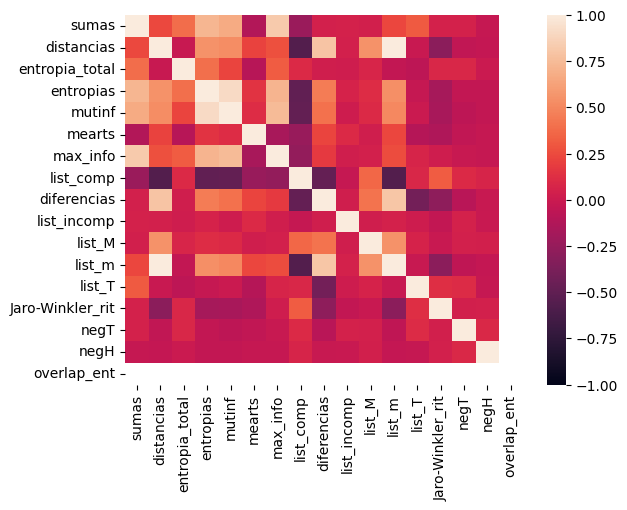

In [73]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [74]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.240261,0.390214,0.723429,0.670427,-0.117400,0.826617,-0.230034,0.045405,0.049419,0.038128,0.227073,0.312071,0.051398,0.050426,-0.025423,NaN
distancias,0.240261,1.000000,-0.018304,0.551792,0.525450,0.211847,0.269460,-0.564641,0.793151,0.045851,0.551511,0.997867,-0.013577,-0.299157,-0.054241,-0.031321,NaN
entropia_total,0.390214,-0.018304,1.000000,0.393905,0.224900,-0.101468,0.312580,0.095336,0.024943,0.018149,0.072036,-0.043704,-0.065799,0.082937,0.078759,-0.006623,NaN
entropias,0.723429,0.551792,0.393905,1.000000,0.913040,0.142597,0.714355,-0.497176,0.447271,0.060057,0.115335,0.533708,-0.026293,-0.176196,-0.045027,-0.040444,NaN
mutinf,0.670427,0.525450,0.224900,0.913040,1.000000,0.112037,0.743971,-0.485042,0.400881,0.011762,0.097580,0.504229,-0.000074,-0.165696,-0.065245,-0.042546,NaN
mearts,-0.117400,0.211847,-0.101468,0.142597,0.112037,1.000000,-0.169687,-0.234912,0.221941,0.098420,0.027182,0.229955,-0.105067,-0.134048,-0.047976,-0.027160,NaN
max_info,0.826617,0.269460,0.312580,0.714355,0.743971,-0.169687,1.000000,-0.262911,0.172153,0.030945,0.039328,0.256944,0.066700,0.021771,-0.023337,-0.027950,NaN
list_comp,-0.230034,-0.564641,0.095336,-0.497176,-0.485042,-0.234912,-0.262911,1.000000,-0.482207,-0.023444,0.366375,-0.567274,0.078510,0.313164,0.097481,0.070095,NaN
diferencias,0.045405,0.793151,0.024943,0.447271,0.400881,0.221941,0.172153,-0.482207,1.000000,0.029004,0.408745,0.797719,-0.410534,-0.283291,-0.093617,-0.020581,NaN
list_incomp,0.049419,0.045851,0.018149,0.060057,0.011762,0.098420,0.030945,-0.023444,0.029004,1.000000,0.027890,0.050040,0.012574,-0.040284,0.050328,-0.011685,NaN


In [75]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [76]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [77]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

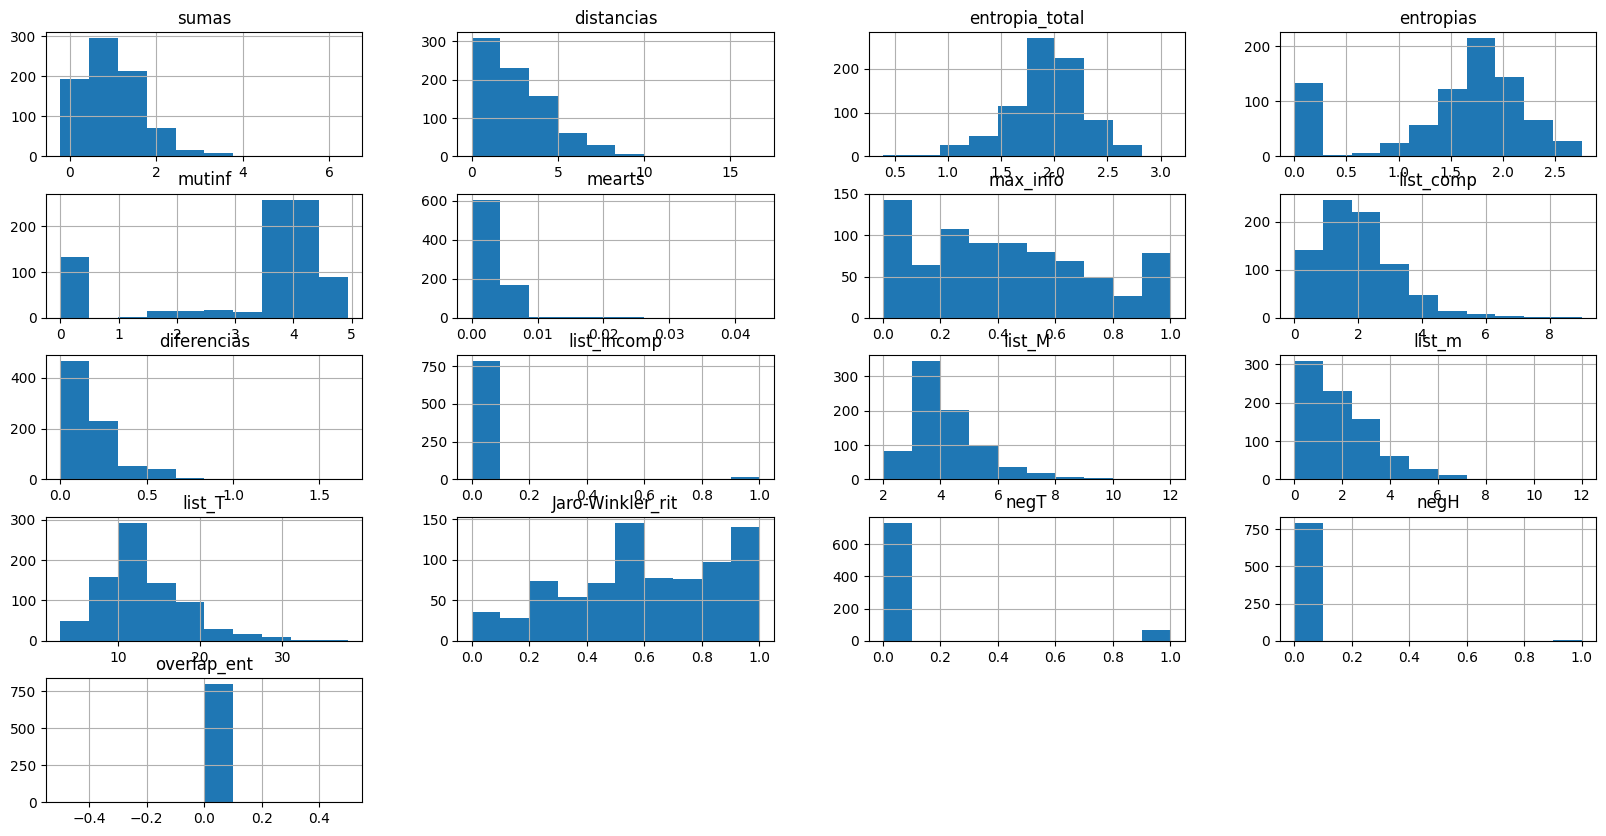

In [78]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [79]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4d/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/GHS/GHS_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [80]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,1.069605,1.443669,1.894,1.650,3.957286,0.003384,0.292227,2,0.083333,0,3,1,12,0.800000,0,,0,,0.0,ENTAILMENT
1,0.388348,17.148390,1.858,1.829,3.912711,0.005078,0.236464,2,2.400000,0,14,12,5,0.047619,0,,0,,0.0,NONENTAILMENT
2,0.680845,11.677258,1.647,1.647,3.904026,0.005496,0.294481,0,0.666667,0,8,8,12,0.307692,0,,0,,0.0,NONENTAILMENT
3,0.657589,2.409785,1.733,1.447,1.927472,0.002409,0.174230,2,0.222222,0,4,2,9,0.833333,0,,0,,0.0,ENTAILMENT
4,0.203426,18.545332,1.768,1.654,3.863075,0.005576,0.161000,1,3.250000,0,14,13,4,0.130435,0,,0,,0.0,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.744293,19.288172,1.669,1.669,3.415233,0.003270,0.298539,0,1.272727,0,14,14,11,0.142857,0,,0,,0.0,NONENTAILMENT
796,1.275078,4.325136,1.971,1.980,4.097006,0.003054,0.544385,1,0.214286,0,4,3,14,0.571429,0,,0,,0.0,ENTAILMENT
797,0.475233,14.014017,1.693,1.619,3.601693,0.008069,0.270751,1,1.000000,0,11,10,10,0.111111,0,,0,,0.0,NONENTAILMENT
798,0.658441,14.524587,2.148,2.144,3.758711,0.004804,0.320858,1,1.000000,0,11,10,10,0.150000,0,,1,do,0.0,NONENTAILMENT


In [81]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)


In [82]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.069605,1.443669,1.894,1.650,3.957286,0.003384,0.292227,2,0.083333,0,3,1,12,0.800000,0,0,0.0,ENTAILMENT
1,0.388348,17.148390,1.858,1.829,3.912711,0.005078,0.236464,2,2.400000,0,14,12,5,0.047619,0,0,0.0,NONENTAILMENT
2,0.680845,11.677258,1.647,1.647,3.904026,0.005496,0.294481,0,0.666667,0,8,8,12,0.307692,0,0,0.0,NONENTAILMENT
3,0.657589,2.409785,1.733,1.447,1.927472,0.002409,0.174230,2,0.222222,0,4,2,9,0.833333,0,0,0.0,ENTAILMENT
4,0.203426,18.545332,1.768,1.654,3.863075,0.005576,0.161000,1,3.250000,0,14,13,4,0.130435,0,0,0.0,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.744293,19.288172,1.669,1.669,3.415233,0.003270,0.298539,0,1.272727,0,14,14,11,0.142857,0,0,0.0,NONENTAILMENT
796,1.275078,4.325136,1.971,1.980,4.097006,0.003054,0.544385,1,0.214286,0,4,3,14,0.571429,0,0,0.0,ENTAILMENT
797,0.475233,14.014017,1.693,1.619,3.601693,0.008069,0.270751,1,1.000000,0,11,10,10,0.111111,0,0,0.0,NONENTAILMENT
798,0.658441,14.524587,2.148,2.144,3.758711,0.004804,0.320858,1,1.000000,0,11,10,10,0.150000,0,1,0.0,NONENTAILMENT


In [83]:
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [84]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.069605,1.443669,1.894,1.650,3.957286,0.003384,0.292227,2,0.083333,0,3,1,12,0.800000,0,0,0.0,ENTAILMENT
1,0.388348,17.148390,1.858,1.829,3.912711,0.005078,0.236464,2,2.400000,0,14,12,5,0.047619,0,0,0.0,NONENTAILMENT
2,0.680845,11.677258,1.647,1.647,3.904026,0.005496,0.294481,0,0.666667,0,8,8,12,0.307692,0,0,0.0,NONENTAILMENT
3,0.657589,2.409785,1.733,1.447,1.927472,0.002409,0.174230,2,0.222222,0,4,2,9,0.833333,0,0,0.0,ENTAILMENT
4,0.203426,18.545332,1.768,1.654,3.863075,0.005576,0.161000,1,3.250000,0,14,13,4,0.130435,0,0,0.0,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.744293,19.288172,1.669,1.669,3.415233,0.003270,0.298539,0,1.272727,0,14,14,11,0.142857,0,0,0.0,NONENTAILMENT
796,1.275078,4.325136,1.971,1.980,4.097006,0.003054,0.544385,1,0.214286,0,4,3,14,0.571429,0,0,0.0,ENTAILMENT
797,0.475233,14.014017,1.693,1.619,3.601693,0.008069,0.270751,1,1.000000,0,11,10,10,0.111111,0,0,0.0,NONENTAILMENT
798,0.658441,14.524587,2.148,2.144,3.758711,0.004804,0.320858,1,1.000000,0,11,10,10,0.150000,0,1,0.0,NONENTAILMENT


In [85]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [86]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [87]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [88]:
# X_train = np.where(np.isnan(X_train), 0, X_train)
# X_train

In [89]:
X_train.shape

(800, 17)

In [90]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [91]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [92]:
model.decision_function(X_train)

array([ 1.86849380e-01,  1.59626094e+00,  4.35038848e-01,  1.61701332e+00,
        2.87555045e-04,  5.96956389e-03,  1.70766519e-01, -8.92641906e-01,
        1.67452933e-01, -1.81910015e-01,  3.11662901e-01, -4.24145896e-01,
        9.28952664e-01,  8.62171129e-02, -1.08810265e+00,  2.75041930e-01,
        7.71559310e-02,  9.56176556e-01,  6.89862476e-03,  4.91311283e-01,
        1.10069267e+00, -7.83413478e-01,  2.46943440e-01,  6.48006905e-01,
        2.02169471e-01,  2.25287789e-01, -2.46533941e-02, -1.06611513e+00,
        8.22478067e-01, -5.01713917e-01,  5.46793982e-01,  1.11584924e-01,
        2.86661383e-01,  6.97848204e-02, -3.40483200e-01, -9.71018818e-01,
        4.88812445e-01,  7.28321535e-01,  1.12209431e+00,  8.08540594e-01,
        1.23805871e+00,  2.97325583e-01,  2.94561183e-01,  4.09373506e-01,
       -1.31580495e+00, -1.38029377e+00,  1.08921098e-01,  8.25045905e-01,
        4.73509611e-01,  2.81783886e-01, -5.10316659e-01,  9.74146075e-01,
       -1.13116122e-01,  

In [93]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [94]:
model.classes_

array([0, 1])

In [95]:
model.coef_[0]

array([ 0.63509067, -1.08004762,  0.70895999, -0.59675788, -0.13825096,
       -1.173203  ,  0.51906862,  1.10900009,  0.13068615, -0.33934689,
        0.04918295, -0.99037217,  0.56873128,  1.73117873, -0.19410295,
       -0.53119101,  0.        ])

In [96]:
coeficientes=model.coef_[0]

In [97]:
coeficientes

array([ 0.63509067, -1.08004762,  0.70895999, -0.59675788, -0.13825096,
       -1.173203  ,  0.51906862,  1.10900009,  0.13068615, -0.33934689,
        0.04918295, -0.99037217,  0.56873128,  1.73117873, -0.19410295,
       -0.53119101,  0.        ])

In [98]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  13 Jaro-Winkler_rit 5 mearts


In [99]:
n_columns=train.shape[1]-1

In [100]:
n_columns

17

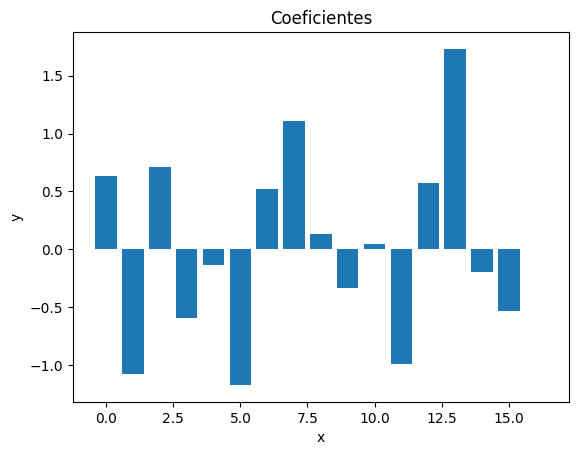

In [101]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [102]:
# X_test = np.where(np.isnan(X_test), 0, X_test)
# X_test

In [103]:
X_test.shape

(800, 17)

In [104]:
predictions = model.predict(X_test)

In [105]:
predictions

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [106]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,1.069605,1.443669,1.894,1.650,3.957286,0.003384,0.292227,2,0.083333,0,3,1,12,0.800000,0,0,0.0,ENTAILMENT,1
1,0.388348,17.148390,1.858,1.829,3.912711,0.005078,0.236464,2,2.400000,0,14,12,5,0.047619,0,0,0.0,NONENTAILMENT,0
2,0.680845,11.677258,1.647,1.647,3.904026,0.005496,0.294481,0,0.666667,0,8,8,12,0.307692,0,0,0.0,NONENTAILMENT,0
3,0.657589,2.409785,1.733,1.447,1.927472,0.002409,0.174230,2,0.222222,0,4,2,9,0.833333,0,0,0.0,ENTAILMENT,1
4,0.203426,18.545332,1.768,1.654,3.863075,0.005576,0.161000,1,3.250000,0,14,13,4,0.130435,0,0,0.0,NONENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.744293,19.288172,1.669,1.669,3.415233,0.003270,0.298539,0,1.272727,0,14,14,11,0.142857,0,0,0.0,NONENTAILMENT,0
796,1.275078,4.325136,1.971,1.980,4.097006,0.003054,0.544385,1,0.214286,0,4,3,14,0.571429,0,0,0.0,ENTAILMENT,1
797,0.475233,14.014017,1.693,1.619,3.601693,0.008069,0.270751,1,1.000000,0,11,10,10,0.111111,0,0,0.0,NONENTAILMENT,0
798,0.658441,14.524587,2.148,2.144,3.758711,0.004804,0.320858,1,1.000000,0,11,10,10,0.150000,0,1,0.0,NONENTAILMENT,0


In [107]:
incorrectos = test[(test["clases"]=="ENTAILMENT") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
10,0.958235,4.328273,1.873,1.873,3.759236,0.004273,0.355036,1,0.250000,0,4,3,12,0.500000,0,0,0.0,ENTAILMENT,0
16,0.950161,8.767391,1.957,1.879,4.017081,0.003974,0.417785,1,0.428571,0,7,6,14,0.600000,0,0,0.0,ENTAILMENT,0
23,0.613463,5.828772,1.763,1.538,3.876394,0.004517,0.205379,2,0.250000,0,6,4,16,0.375000,0,0,0.0,ENTAILMENT,0
34,0.653508,2.915900,2.128,2.141,3.868481,0.004766,0.253705,1,0.222222,0,3,2,9,0.666667,0,0,0.0,ENTAILMENT,0
38,0.728548,2.907077,1.844,1.775,3.862255,0.004165,0.263572,1,0.181818,0,3,2,11,0.333333,0,0,0.0,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0.283397,4.420555,1.274,1.274,3.953774,0.003568,0.113219,0,0.272727,0,3,3,11,0.400000,0,0,0.0,ENTAILMENT,0
782,0.437739,2.978732,1.758,1.750,3.836260,0.004847,0.276974,2,0.181818,0,4,2,11,0.333333,0,0,0.0,ENTAILMENT,0
783,0.290536,6.769506,1.521,1.521,3.077273,0.012808,0.186931,0,0.714286,0,5,5,7,0.500000,0,0,0.0,ENTAILMENT,0
787,0.485379,4.314276,1.868,1.868,3.912345,0.004094,0.296234,0,0.428571,0,3,3,7,0.333333,0,0,0.0,ENTAILMENT,0


In [108]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[249 150]
 [ 11 390]]


In [109]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.8
precision:  0.96
recall 0.62
f1_score:  0.76
matthews_score:  0.64


In [110]:
X_train.shape

(800, 17)

In [111]:
X_test.shape

(800, 17)

In [112]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [113]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [119]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.800000 (0.029155)
Logistic Regression Precision:: 0.770000 (0.030687)
Logistic Regression Recall:: 0.850000 (0.034006)
Logistic Regression F1-score:: 0.800000 (0.029015)


In [117]:
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')

In [118]:
print(cv_results)
print(round(cv_results.mean(),2))
print(round(cv_results.std(),2))

[0.8125  0.80625 0.79375 0.8125  0.83125 0.75625 0.8125  0.8125  0.76875
 0.76875]
0.8
0.02


In [58]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.790000 (0.163133)
Logistic Regression Recall:: 0.840000 (0.072499)
Logistic Regression F1-score:: 0.810000 (0.113361)


In [59]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.560000 (0.313374)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.790000 (0.145034)
Logistic Regression Recall:: 0.780000 (0.146267)
Logistic Regression F1-score:: 0.770000 (0.160071)


In [110]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.150021)
Logistic Regression Recall:: 0.840000 (0.150021)
Logistic Regression F1-score:: 0.840000 (0.150021)


In [111]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.840000 (0.141452)
Logistic Regression Recall:: 0.830000 (0.152177)
Logistic Regression F1-score:: 0.830000 (0.168243)


In [112]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [57]:
#linear_model

In [58]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [269]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       401
           1       0.98      0.57      0.72       399

    accuracy                           0.78       800
   macro avg       0.84      0.78      0.77       800
weighted avg       0.84      0.78      0.77       800

[[229 170]
 [  4 397]]


In [270]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [271]:
test.columns[:-1]

Index(['sumas', 'distancias', 'mutinf', 'max_info', 'list_M',
       'Jaro-Winkler_rit', 'overlap_ent', 'clases'],
      dtype='object')

In [272]:
explainer.expected_value

-0.17935426760892378

In [273]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.66666667],
       [0.15762408, 0.50211939, 0.82896449, ..., 0.76190476, 0.04761905,
        0.        ],
       [0.30290529, 0.33051544, 0.96507483, ..., 0.76923077, 0.30769231,
        0.        ],
       ...,
       [0.19403266, 0.47353093, 0.81139307, ..., 0.83333333, 0.11111111,
        0.        ],
       [0.325549  , 0.49015714, 0.87134765, ..., 0.75      , 0.15      ,
        0.09090909],
       [0.2866686 , 0.26004892, 0.93563382, ..., 0.66666667, 0.33333333,
        0.16666667]])

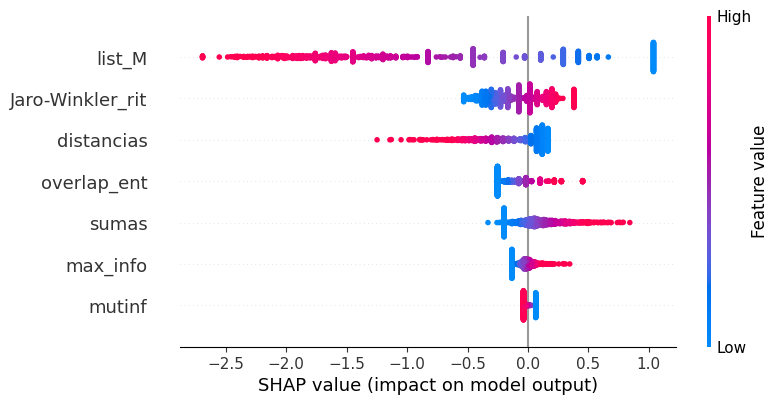

In [274]:
shap.plots.beeswarm(shap_values)

In [275]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.35626913 0.39154871 0.93267485 0.30348551 0.75       0.375
 0.07692308] 0 0


IndexError: index 7 is out of bounds for axis 0 with size 7

In [66]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.19358178 0.04059002 0.61307902 0.44772546 0.9577156  0.1034393
 0.25356351 0.33333333 0.00986842 0.         0.17073171 0.04
 0.44444444 0.85714286 0.         1.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

In [350]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
['sumas', 'distancias', 'entropia_total', 'mutinf','mearts', 'max_info',  'diferencias', 'list_M', 'list_m', 'Jaro-Winkler_rit','overlap_ent']

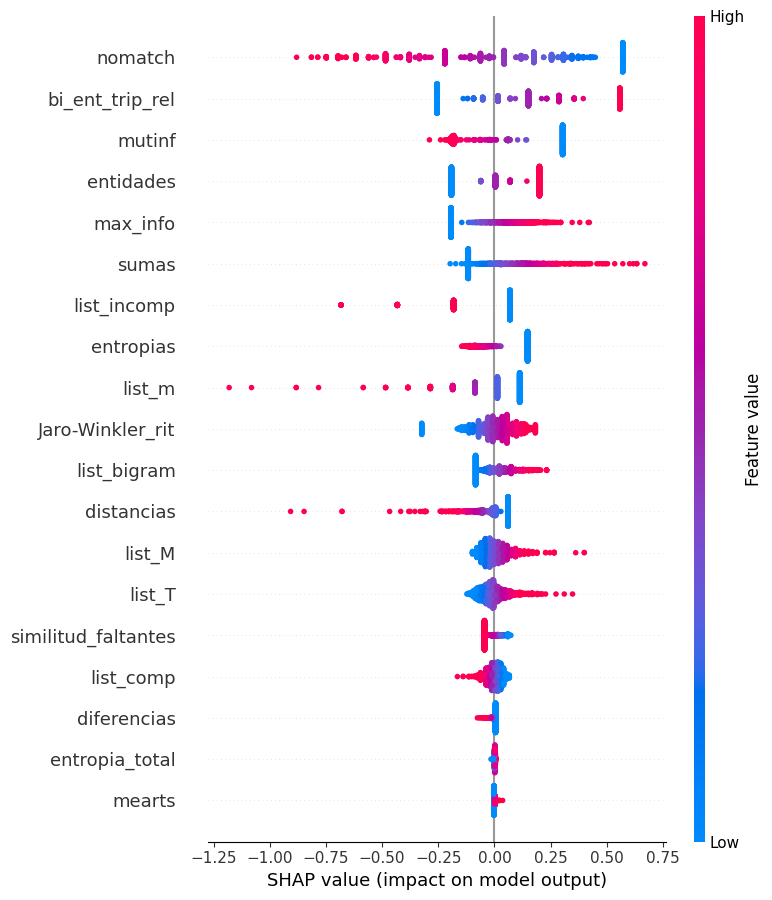

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

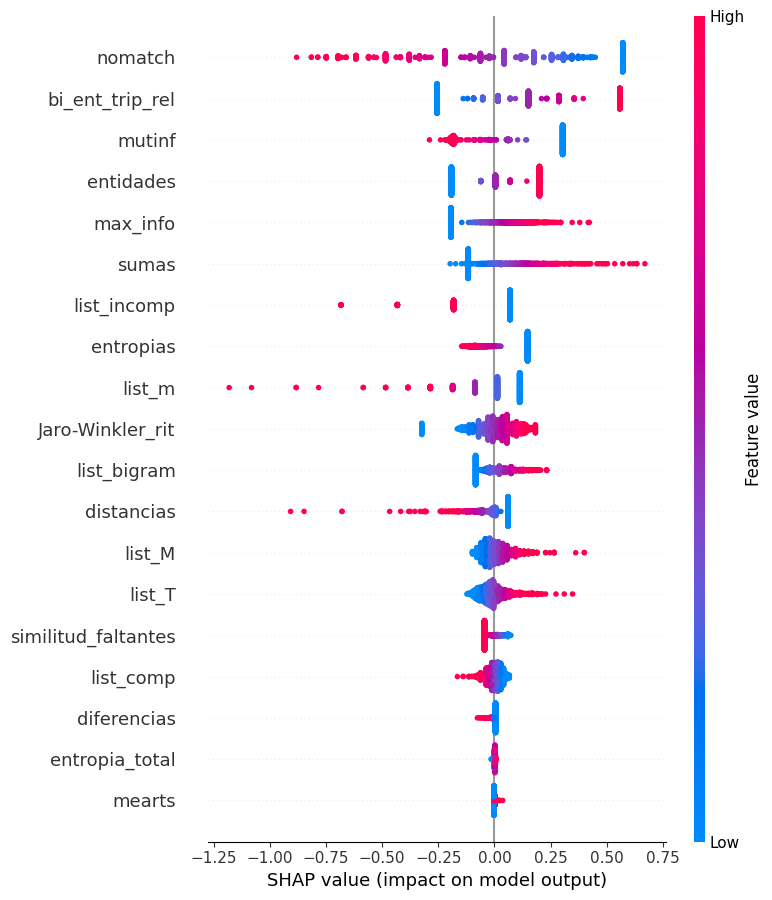

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

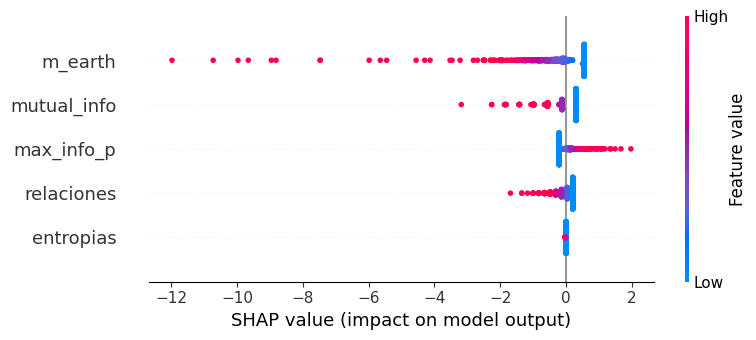

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [448]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [449]:
y_train.count(1)

412

In [450]:
y_train.count(0)

388

In [451]:
# y_trainC=[]
# for j in range(len(y_train)):
#     if y_train[j]==1:
#         y_trainC.append("entailment")
#     else:
#         y_trainC.append("not_entailment")

In [452]:
print(len(y_train))
print(len(y_trainC))

800
800


In [453]:
y_trainC.count("not_entailment")

388

In [454]:
y_train.count(0)

388

In [455]:
# y_testC=[]
# for j in range(len(y_test)):
#     if y_test[j]==1:
#         y_testC.append("entailment")
#     else:
#         y_testC.append("not_entailment")

In [456]:
print(len(y_test))
print(len(y_testC))

800
800


In [457]:
y_testC.count("not_entailment")

401

In [458]:
y_test.count(0)

401

In [459]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [460]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [461]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))# 
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.72
precision:  0.79
recall 0.58
f1_score:  0.67
matthews_score:  0.45


In [462]:
validation_size = 0.10
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [463]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.790000 (0.039461)
DecisionTree: 0.790000 (0.061346)
DecisionTree: 0.820000 (0.053830)
DecisionTree: 0.810000 (0.036024)


In [464]:
print(cv_results)

[0.82926829 0.82352941 0.74647887 0.81818182 0.78911565 0.81889764
 0.76623377 0.81538462 0.85185185 0.875     ]


In [465]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[340,  61],
       [166, 233]])

In [466]:
c

Index(['distancias', 'mutinf', 'max_info', 'diferencias', 'Jaro-Winkler_rit',
       'overlap_ent'],
      dtype='object')

In [467]:
from sklearn import tree

In [468]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.26
|   |--- feature_0 <= 0.01
|   |   |--- feature_4 <= 0.30
|   |   |   |--- feature_4 <= 0.16
|   |   |   |   |--- feature_5 <= 0.98
|   |   |   |   |   |--- feature_5 <= 0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.42
|   |   |   |   |   |   |--- feature_5 <= 0.57
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  0.57
|   |   |   |   |   |   |   |--- feature_5 <= 0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  0.98
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.16
|   |   |   |   |--- feature_5 <= 0.46
|   |   |   |   |   |--- feature_4 <= 0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.46
|   |   |   |   |   |--- feature_4 <= 0.24


Profundidad del árbol: 17
Número de nodos terminales: 267


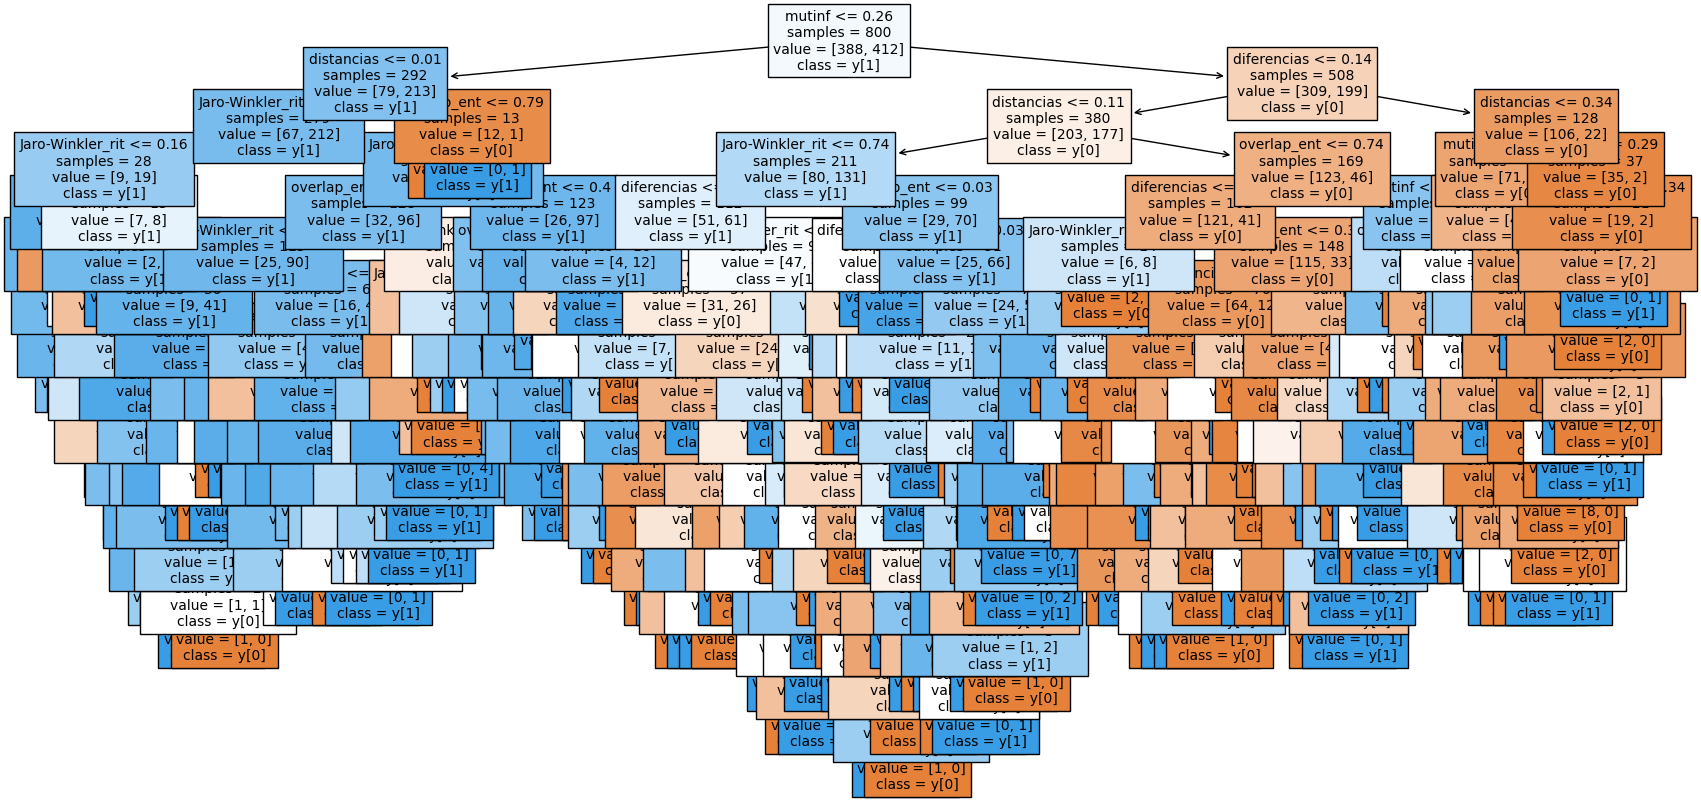

In [469]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )